# Credit EDA Assignment

Problem statement - The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it to their advantage by becoming a defaulter. We are using EDA to analyse the patterns present. This will ensure that the applicants capable of repaying the loan are not rejected.

# Import neccesary libraries

In [1]:
import pandas as pd , numpy as np
import matplotlib.pyplot as plt, seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importing data

In [2]:
 #import data
app_data = pd.read_csv('application_data.csv')
pd.set_option("display.max_columns", None) 
app_data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [3]:
#check for the rows and columns of dataframe
app_data.shape

(307511, 122)

In [4]:
#describe the dataset
app_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [5]:
#checking data type of all columns
app_data.info(all)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

# Data Handling and Cleaning

The first few steps involve making sure that there are no missing values or incorrect data types before we proceed to the analysis stage. 
These aforementioned problems are handled as follows:

For Missing Values: Some common techniques to treat this issue are,
Dropping the rows containing the missing values,
Imputing the missing values,
Keep the missing values if they don't affect the analysis.

Incorrect Data Types:
Clean certain values,
Clean and convert an entire column.

In [6]:
#getting sum of null values in each column
pd.set_option("display.max_rows", None) 
app_data.isnull().sum().sort_values(ascending = False)

COMMONAREA_MEDI                 214865
COMMONAREA_AVG                  214865
COMMONAREA_MODE                 214865
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAPARTMENTS_MEDI        213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_MODE           210199
LIVINGAPARTMENTS_AVG            210199
LIVINGAPARTMENTS_MEDI           210199
FLOORSMIN_AVG                   208642
FLOORSMIN_MODE                  208642
FLOORSMIN_MEDI                  208642
YEARS_BUILD_MEDI                204488
YEARS_BUILD_MODE                204488
YEARS_BUILD_AVG                 204488
OWN_CAR_AGE                     202929
LANDAREA_MEDI                   182590
LANDAREA_MODE                   182590
LANDAREA_AVG                    182590
BASEMENTAREA_MEDI               179943
BASEMENTAREA_AVG                179943
BASEMENTAREA_MODE               179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_MODE              169682
NONLIVINGAREA_AVG        

In [7]:
#creating a function to get percentage of null values in each column
def null_percentage(app_data):
    return (app_data.isnull().sum()/(len(app_data))*100)

In [8]:
null_percentage(app_data).sort_values(ascending = False)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [9]:
#Total number of columns with null values greater than 50%
null_cols = null_percentage(app_data)[null_percentage(app_data)>50]
null_cols.shape

(41,)

In [10]:
null_cols.index

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
       'WALLSMATERIAL_MODE'],
      dtype='object')

In [11]:
#dropping null values greater than 50%
app_data.drop(columns = null_cols.index,axis=1, inplace = True)

In [12]:
#checking null values less than 50%
null_cols1 = null_percentage(app_data)[null_percentage(app_data)<50].sort_values(ascending = False)
null_cols1

FLOORSMAX_AVG                   49.760822
FLOORSMAX_MODE                  49.760822
FLOORSMAX_MEDI                  49.760822
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BEGINEXPLUATATION_MEDI    48.781019
TOTALAREA_MODE                  48.268517
EMERGENCYSTATE_MODE             47.398304
OCCUPATION_TYPE                 31.345545
EXT_SOURCE_3                    19.825307
AMT_REQ_CREDIT_BUREAU_YEAR      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR      13.501631
AMT_REQ_CREDIT_BUREAU_DAY       13.501631
AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
AMT_REQ_CREDIT_BUREAU_MON       13.501631
AMT_REQ_CREDIT_BUREAU_QRT       13.501631
NAME_TYPE_SUITE                  0.420148
DEF_30_CNT_SOCIAL_CIRCLE         0.332021
OBS_60_CNT_SOCIAL_CIRCLE         0.332021
DEF_60_CNT_SOCIAL_CIRCLE         0.332021
OBS_30_CNT_SOCIAL_CIRCLE         0.332021
EXT_SOURCE_2                     0.214626
AMT_GOODS_PRICE                  0.090403
AMT_ANNUITY                      0

In [13]:
#drop unrelated columns
app_data.drop(app_data[['FLOORSMAX_AVG','FLOORSMAX_MODE','TOTALAREA_MODE','EMERGENCYSTATE_MODE',
                        'FLOORSMAX_MEDI',
                        'YEARS_BEGINEXPLUATATION_AVG',
                        'YEARS_BEGINEXPLUATATION_MODE',
                        'YEARS_BEGINEXPLUATATION_MEDI']],axis=1, inplace = True)

In [14]:
app_data.shape

(307511, 73)

In [15]:
#data with less than 15% missing values
null_cols1 = null_percentage(app_data)[null_percentage(app_data)<50].sort_values(ascending = False)
null_cols1

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
NAME_TYPE_SUITE                 0.420148
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
FLAG_DOCUMENT_17                0.000000
FLAG_DOCUMENT_18                0.000000
FLAG_DOCUMENT_21                0.000000
FLAG_DOCUMENT_20                0.000000
FLAG_DOCUMENT_19                0.000000
FLAG_DOCUMENT_2                 0.000000
FLAG_DOCUMENT_3 

In [16]:
#filling missing values of column OCCUPATION_TYPE
app_data['OCCUPATION_TYPE'].fillna('unknown',inplace=True)
app_data['OCCUPATION_TYPE'].isnull().sum()

0

In [17]:
##checking data of gender column
app_data.CODE_GENDER.value_counts(normalize = True) 

F      0.658344
M      0.341643
XNA    0.000013
Name: CODE_GENDER, dtype: float64

In [18]:
# remove XNA '
app_data['CODE_GENDER']=app_data['CODE_GENDER'].apply(lambda x: app_data.mode()['CODE_GENDER'][0]
 if x=='XNA' else x) 
app_data['CODE_GENDER'].value_counts(normalize = True)

F    0.658357
M    0.341643
Name: CODE_GENDER, dtype: float64

## Univariate analysis

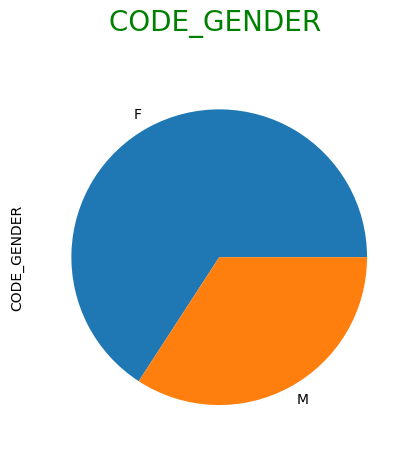

In [19]:
#plot a pie chart for gender of loan applicant
app_data["CODE_GENDER"].value_counts(normalize= True).plot.pie()
plt.title("CODE_GENDER \n", fontdict={"fontsize":20,'fontweight' : 5, 'color' : 'Green'})
plt.show()

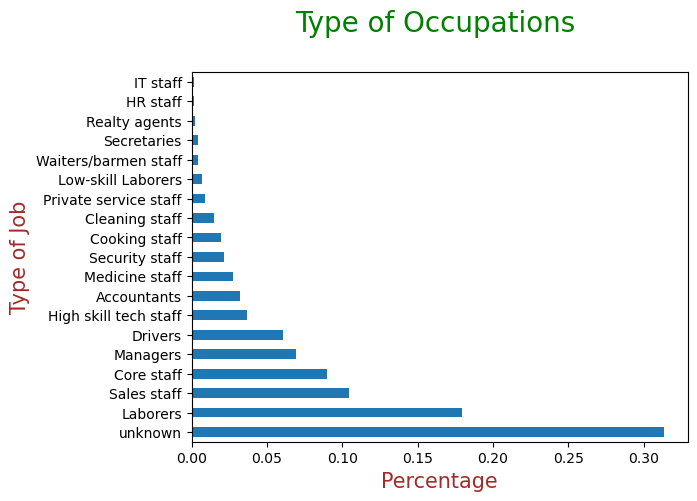

In [20]:
#plot bar graph for OCCUPATION_TYPE
app_data["OCCUPATION_TYPE"].value_counts(normalize= True).plot.barh()
plt.title("Type of Occupations \n", fontdict={"fontsize":20,'fontweight' : 5, 'color' : 'green'})
plt.xlabel("Percentage", fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Type of Job", fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

There are negative values in column stated below changing values to positive and converting days to years to understand better.

In [21]:
#creating a different column to convert days into years and treating negative value
app_data['AGE_IN_YEARS'] = app_data['DAYS_BIRTH']/365*-1
app_data['YEARS_EMPLOYED'] = app_data['DAYS_EMPLOYED']/365*-1
app_data['YEARS_REGISTRATION'] = app_data['DAYS_REGISTRATION']/365*-1
app_data['YEARS_ID_PUBLISH'] = app_data['DAYS_ID_PUBLISH']/365*-1
app_data['YEARS_LAST_PHONE_CHANGE'] = app_data['DAYS_LAST_PHONE_CHANGE']/365*-1

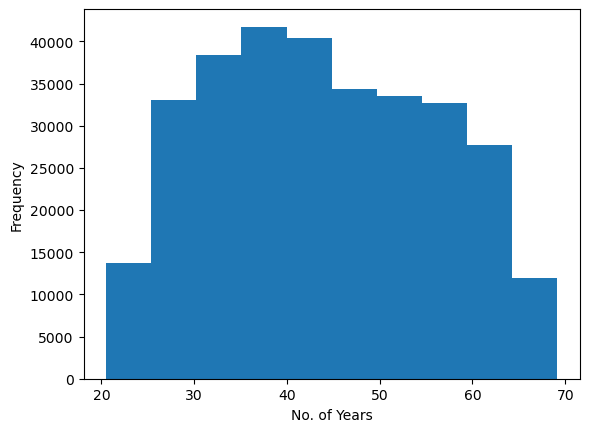

In [22]:
# plot histogram for AGE_IN_YEARS
app_data['AGE_IN_YEARS'].plot.hist()
plt.xlabel('No. of Years')
plt.show()

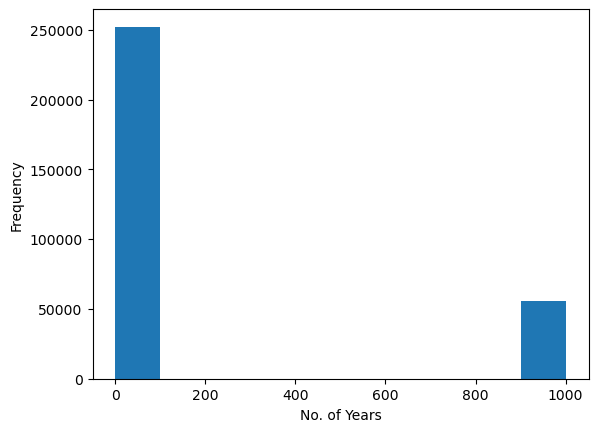

In [23]:
# YEARS_EMPLOYED column have some positive and some negative values therefore applying another function to correct dataset
app_data['YEARS_EMPLOYED'] = [str(x).replace('-',' ') for x in app_data['YEARS_EMPLOYED']]
app_data['YEARS_EMPLOYED'] = app_data['YEARS_EMPLOYED'].astype(float)
app_data['YEARS_EMPLOYED'].plot.hist()
plt.xlabel('No. of Years')
plt.show()

It's clear that DAYS_EMPLOYED column changed to YEARS_EMPLOYED have outliers ,
plotting a boxplot using seaborn to visualize it

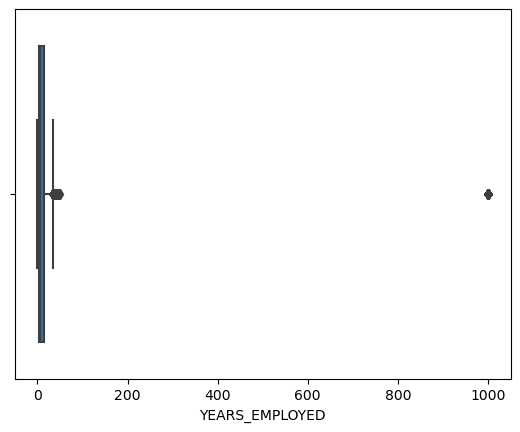

In [24]:
sns.boxplot(app_data['YEARS_EMPLOYED'])
plt.show()

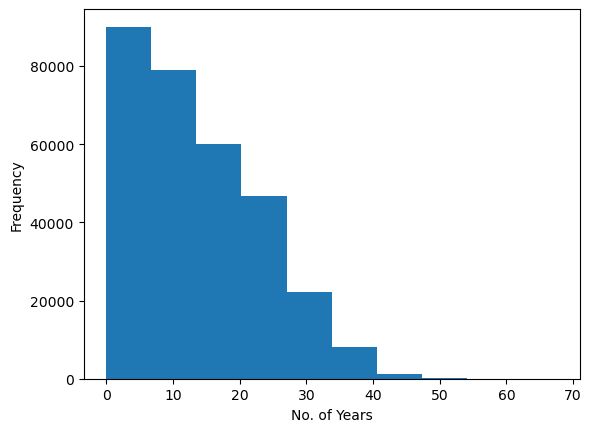

In [25]:
# plot histogram for YEARS_REGISTRATION
app_data['YEARS_REGISTRATION'].plot.hist()
plt.xlabel('No. of Years')
plt.show()

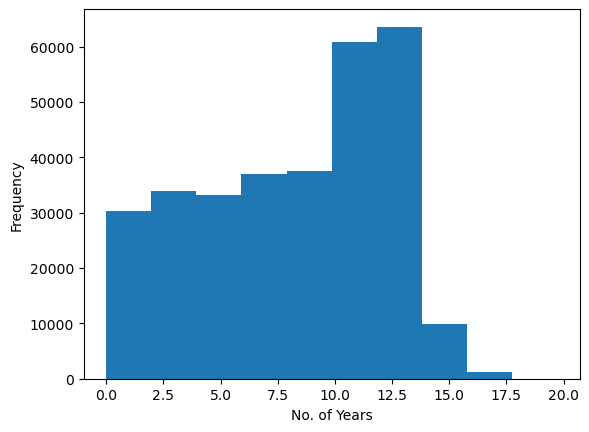

In [26]:
# plot histogram for YEARS_ID_PUBLISH
app_data['YEARS_ID_PUBLISH'].plot.hist()
plt.xlabel('No. of Years')
plt.show()

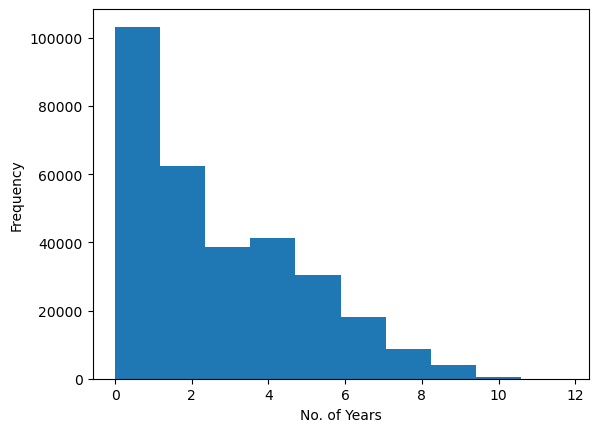

In [27]:
# plot histogram for YEARS_LAST_PHONE_CHANGE
app_data['YEARS_LAST_PHONE_CHANGE'].plot.hist()
plt.xlabel('No. of Years')
plt.show()

### Check imbalance percentage


In [28]:
#Rename 0 & 1 in Target column
app_data["TARGET"]=app_data["TARGET"].replace({1:"Defaulter", 0:"Repayer"})
app_data["TARGET"].value_counts(normalize=True)

Repayer      0.919271
Defaulter    0.080729
Name: TARGET, dtype: float64

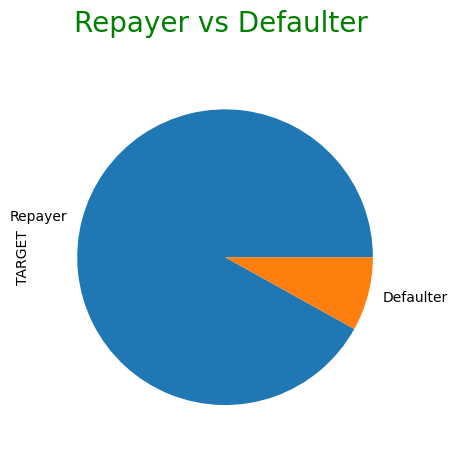

In [29]:
app_data["TARGET"].value_counts(normalize= True).plot.pie()
plt.title("Repayer vs Defaulter \n", fontdict={"fontsize":20,'fontweight' : 5, 'color' : 'Green'})
plt.show()

### Bucketing or binning data into sets

In [30]:
#create bins for AGE_GROUP
app_data["AGE_GROUP"]=pd.cut(app_data.AGE_IN_YEARS,[0, 30, 40, 50, 60, 9999], labels= ["20-30","30-40","40-50","50-60", "60+"])
app_data["AGE_GROUP"].value_counts(normalize= True)

30-40    0.267659
40-50    0.248905
50-60    0.221332
20-30    0.146405
60+      0.115700
Name: AGE_GROUP, dtype: float64

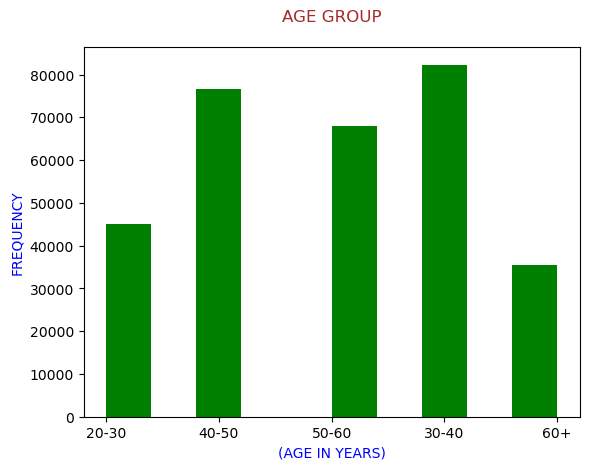

In [31]:
#plot histogram for AGE_GROUP
plt.hist(app_data["AGE_GROUP"], color = 'Green')
plt.xlabel('(AGE IN YEARS)' ,color= 'b' )
plt.ylabel('FREQUENCY' ,color= 'b' )
plt.title('AGE GROUP\n', color= 'brown')
plt.show()

In [32]:
# create bins for WORKING_YEARS 
app_data["WORKING_YEARS"] = pd.cut(app_data["YEARS_EMPLOYED"], bins=[0,5,10,15,20,25,30,50], labels=["0-5","5-10","10-15","15-20","20-25","25-30","30+"])
app_data["WORKING_YEARS"].value_counts(normalize= True)

0-5      0.540619
5-10     0.257291
10-15    0.109263
15-20    0.043029
20-25    0.024761
25-30    0.013120
30+      0.011918
Name: WORKING_YEARS, dtype: float64

In [33]:
#create bins for AMT_INCOME
app_data["AMT_INCOME_TOTAL"]=app_data["AMT_INCOME_TOTAL"]/100000
app_data["AMT_INCOME"] = pd.cut(app_data["AMT_INCOME_TOTAL"],bins = [0,1,2,3,4,5,6,7,8,9,10,11], labels= ['0-1L','1L-2L', '2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','>10L'])
app_data["AMT_INCOME"].value_counts(normalize= True)*100

1L-2L     50.735000
2L-3L     21.210691
0-1L      20.729695
3L-4L      4.776116
4L-5L      1.744669
5L-6L      0.356354
6L-7L      0.282805
8L-9L      0.096980
7L-8L      0.052721
9L-10L     0.009112
>10L       0.005858
Name: AMT_INCOME, dtype: float64

In [34]:
#create bins for AMT_GOODS_PRICE_RANGE
app_data['AMT_GOODS_PRICE']=app_data['AMT_GOODS_PRICE']/100000
app_data['AMT_GOODS_PRICE_RANGE']=pd.cut(app_data['AMT_GOODS_PRICE'],bins = [0,1,2,3,4,5,6,7,8,9,10,100], labels= ['0-1L','1L-2L', '2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','>10L'])
app_data["AMT_GOODS_PRICE_RANGE"].value_counts(normalize= True)*100

2L-3L     20.427819
4L-5L     18.543906
6L-7L     13.027246
>10L      11.105252
1L-2L     10.726712
8L-9L      6.992738
3L-4L      6.906485
5L-6L      4.269398
0-1L       2.834656
7L-8L      2.639690
9L-10L     2.526096
Name: AMT_GOODS_PRICE_RANGE, dtype: float64

In [35]:
#create bins for AMT_CREDIT_RANGE
app_data["AMT_CREDIT"]=app_data["AMT_CREDIT"]/100000
app_data["AMT_CREDIT_RANGE"] = pd.cut(app_data["AMT_CREDIT"],bins = [0,1,2,3,4,5,6,7,8,9,10,100], labels= ['0-1L','1L-2L', '2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','>10L'])
app_data["AMT_CREDIT_RANGE"].value_counts(normalize= True)*100

2L-3L     17.824728
>10L      16.254703
5L-6L     11.131960
4L-5L     10.418489
1L-2L      9.801275
3L-4L      8.564897
6L-7L      7.820533
8L-9L      7.086576
7L-8L      6.241403
9L-10L     2.902986
0-1L       1.952450
Name: AMT_CREDIT_RANGE, dtype: float64

In [36]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_IN_YEARS,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE,AGE_GROUP,WORKING_YEARS,AMT_INCOME,AMT_GOODS_PRICE_RANGE,AMT_CREDIT_RANGE
0,100002,Defaulter,Cash loans,M,N,Y,0,2.025,4.065975,24700.5,3.510,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25.920548,1.745205,9.994521,5.808219,3.106849,20-30,0-5,2L-3L,3L-4L,4L-5L
1,100003,Repayer,Cash loans,F,N,N,0,2.700,12.935025,35698.5,11.295,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45.931507,3.254795,3.249315,0.797260,2.268493,40-50,0-5,2L-3L,>10L,>10L
2,100004,Repayer,Revolving loans,M,Y,Y,0,0.675,1.350000,6750.0,1.350,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52.180822,0.616438,11.671233,6.934247,2.232877,50-60,0-5,0-1L,1L-2L,1L-2L
3,100006,Repayer,Cash loans,F,N,Y,0,1.350,3.126825,29686.5,2.970,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,52.068493,8.326027,26.939726,6.676712,1.690411,50-60,5-10,1L-2L,2L-3L,3L-4L
4,100007,Repayer,Cash loans,M,N,Y,0,1.215,5.130000,21865.5,5.130,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,54.608219,8.323288,11.810959,9.473973,3.030137,50-60,5-10,1L-2L,5L-6L,5L-6L


## Handling Outliers

In [37]:
#create a outliers column and put alll columns under it which are to be analysed
outlier_cols = ['CNT_CHILDREN','AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','AGE_IN_YEARS', 'YEARS_EMPLOYED']
outlier_cols

['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'AGE_IN_YEARS',
 'YEARS_EMPLOYED']

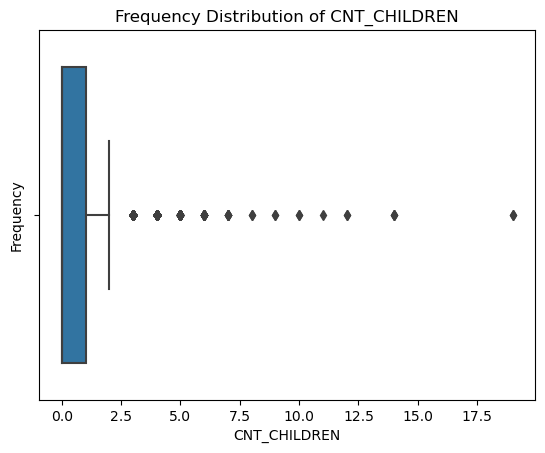

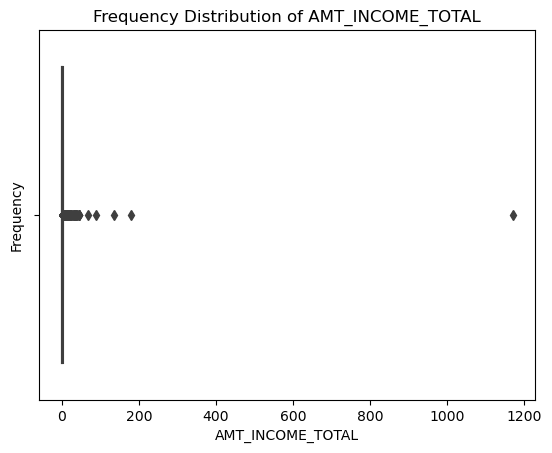

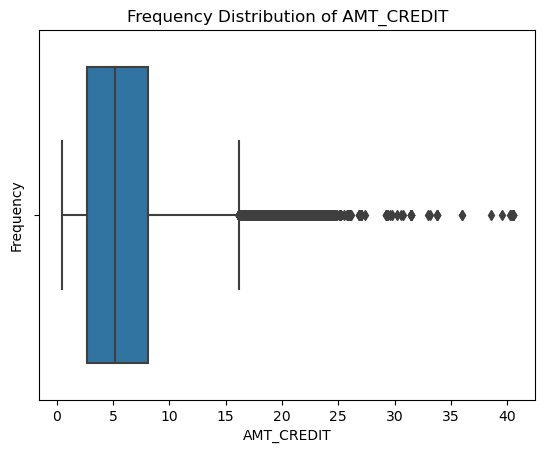

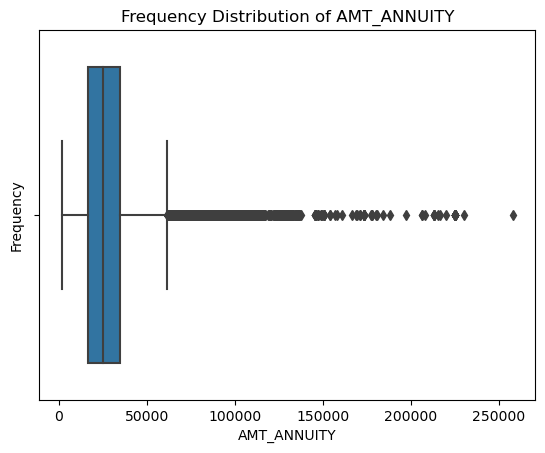

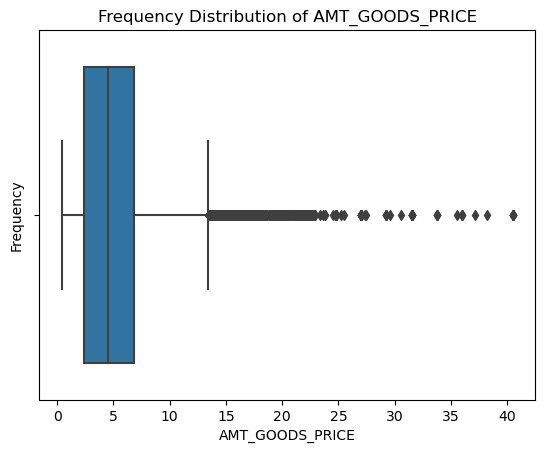

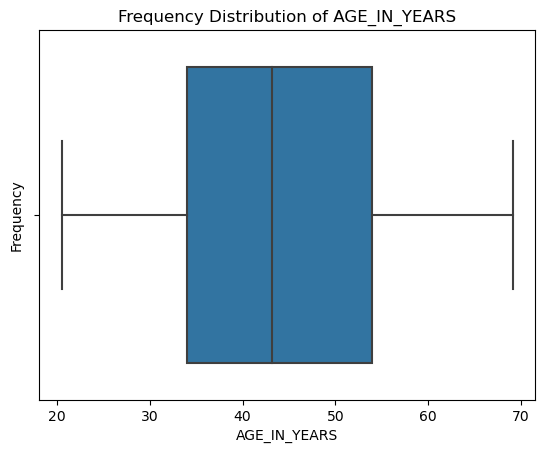

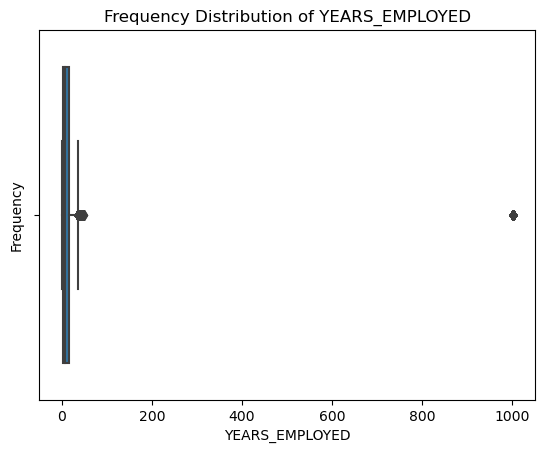

In [38]:
#plot boxplot for outliers columns
for i in outlier_cols:
    sns.boxplot(app_data[i])
    plt.xlabel(i)
    plt.ylabel("Frequency")
    str1="Frequency Distribution of "+i
    plt.title(str1)
    plt.show()

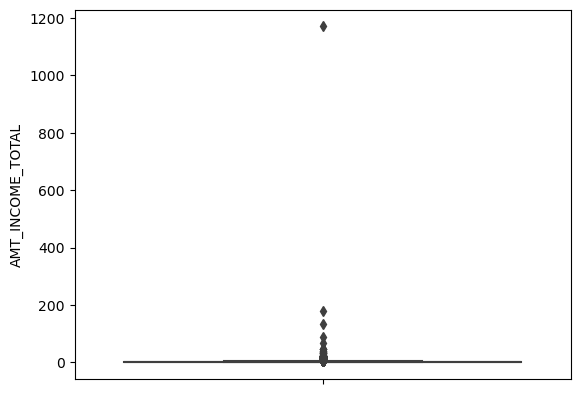

In [39]:
##plot box plot of AMT_INCOME_TOTAL column to check if any outlier is present
sns.boxplot( y=app_data['AMT_INCOME_TOTAL'])
plt.show()

### Following insights are noted down from above plots -



AMT_ANNUITY, AMT_CREDIT, AMT_GOODS_PRICE,CNT_CHILDREN ,AMT_INCOME_TOTAL  have some number of outliers.

AMT_INCOME_TOTAL has huge number of outliers which indicate that few loan applicants have high income compared to others.

AGE_IN_YEARS ha no outliers

YEARS_EMPLOYED has outliers values areound 1000 years which is not a practical value


## Bivariate and Multivariate Analysis

Put all flag columns together and plot with respect to Target variable (i.e. client is either defaulter or Repayer)

In [40]:
# adding all flags coloumns in variable "flag_columns"
flag_cols = [i for i in app_data.columns if "FLAG" in i]
flag_cols

['FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [41]:
# creating flag_df dataframe having all FLAG columns and TARGET column
flag_df = app_data[flag_cols+["TARGET"]]

In [42]:
# as stated in columnn description replacing "1" as Y being TRUE and "0" as N being False
for i in flag_df:
    if i!= "TARGET":
        flag_df[i] = flag_df[i].replace({1:"Y", 0:"N"})
flag_df.head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,TARGET
0,N,Y,Y,Y,N,Y,Y,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Defaulter
1,N,N,Y,Y,N,Y,Y,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Repayer
2,Y,Y,Y,Y,Y,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Repayer
3,N,Y,Y,Y,N,Y,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Repayer
4,N,Y,Y,Y,N,Y,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Repayer


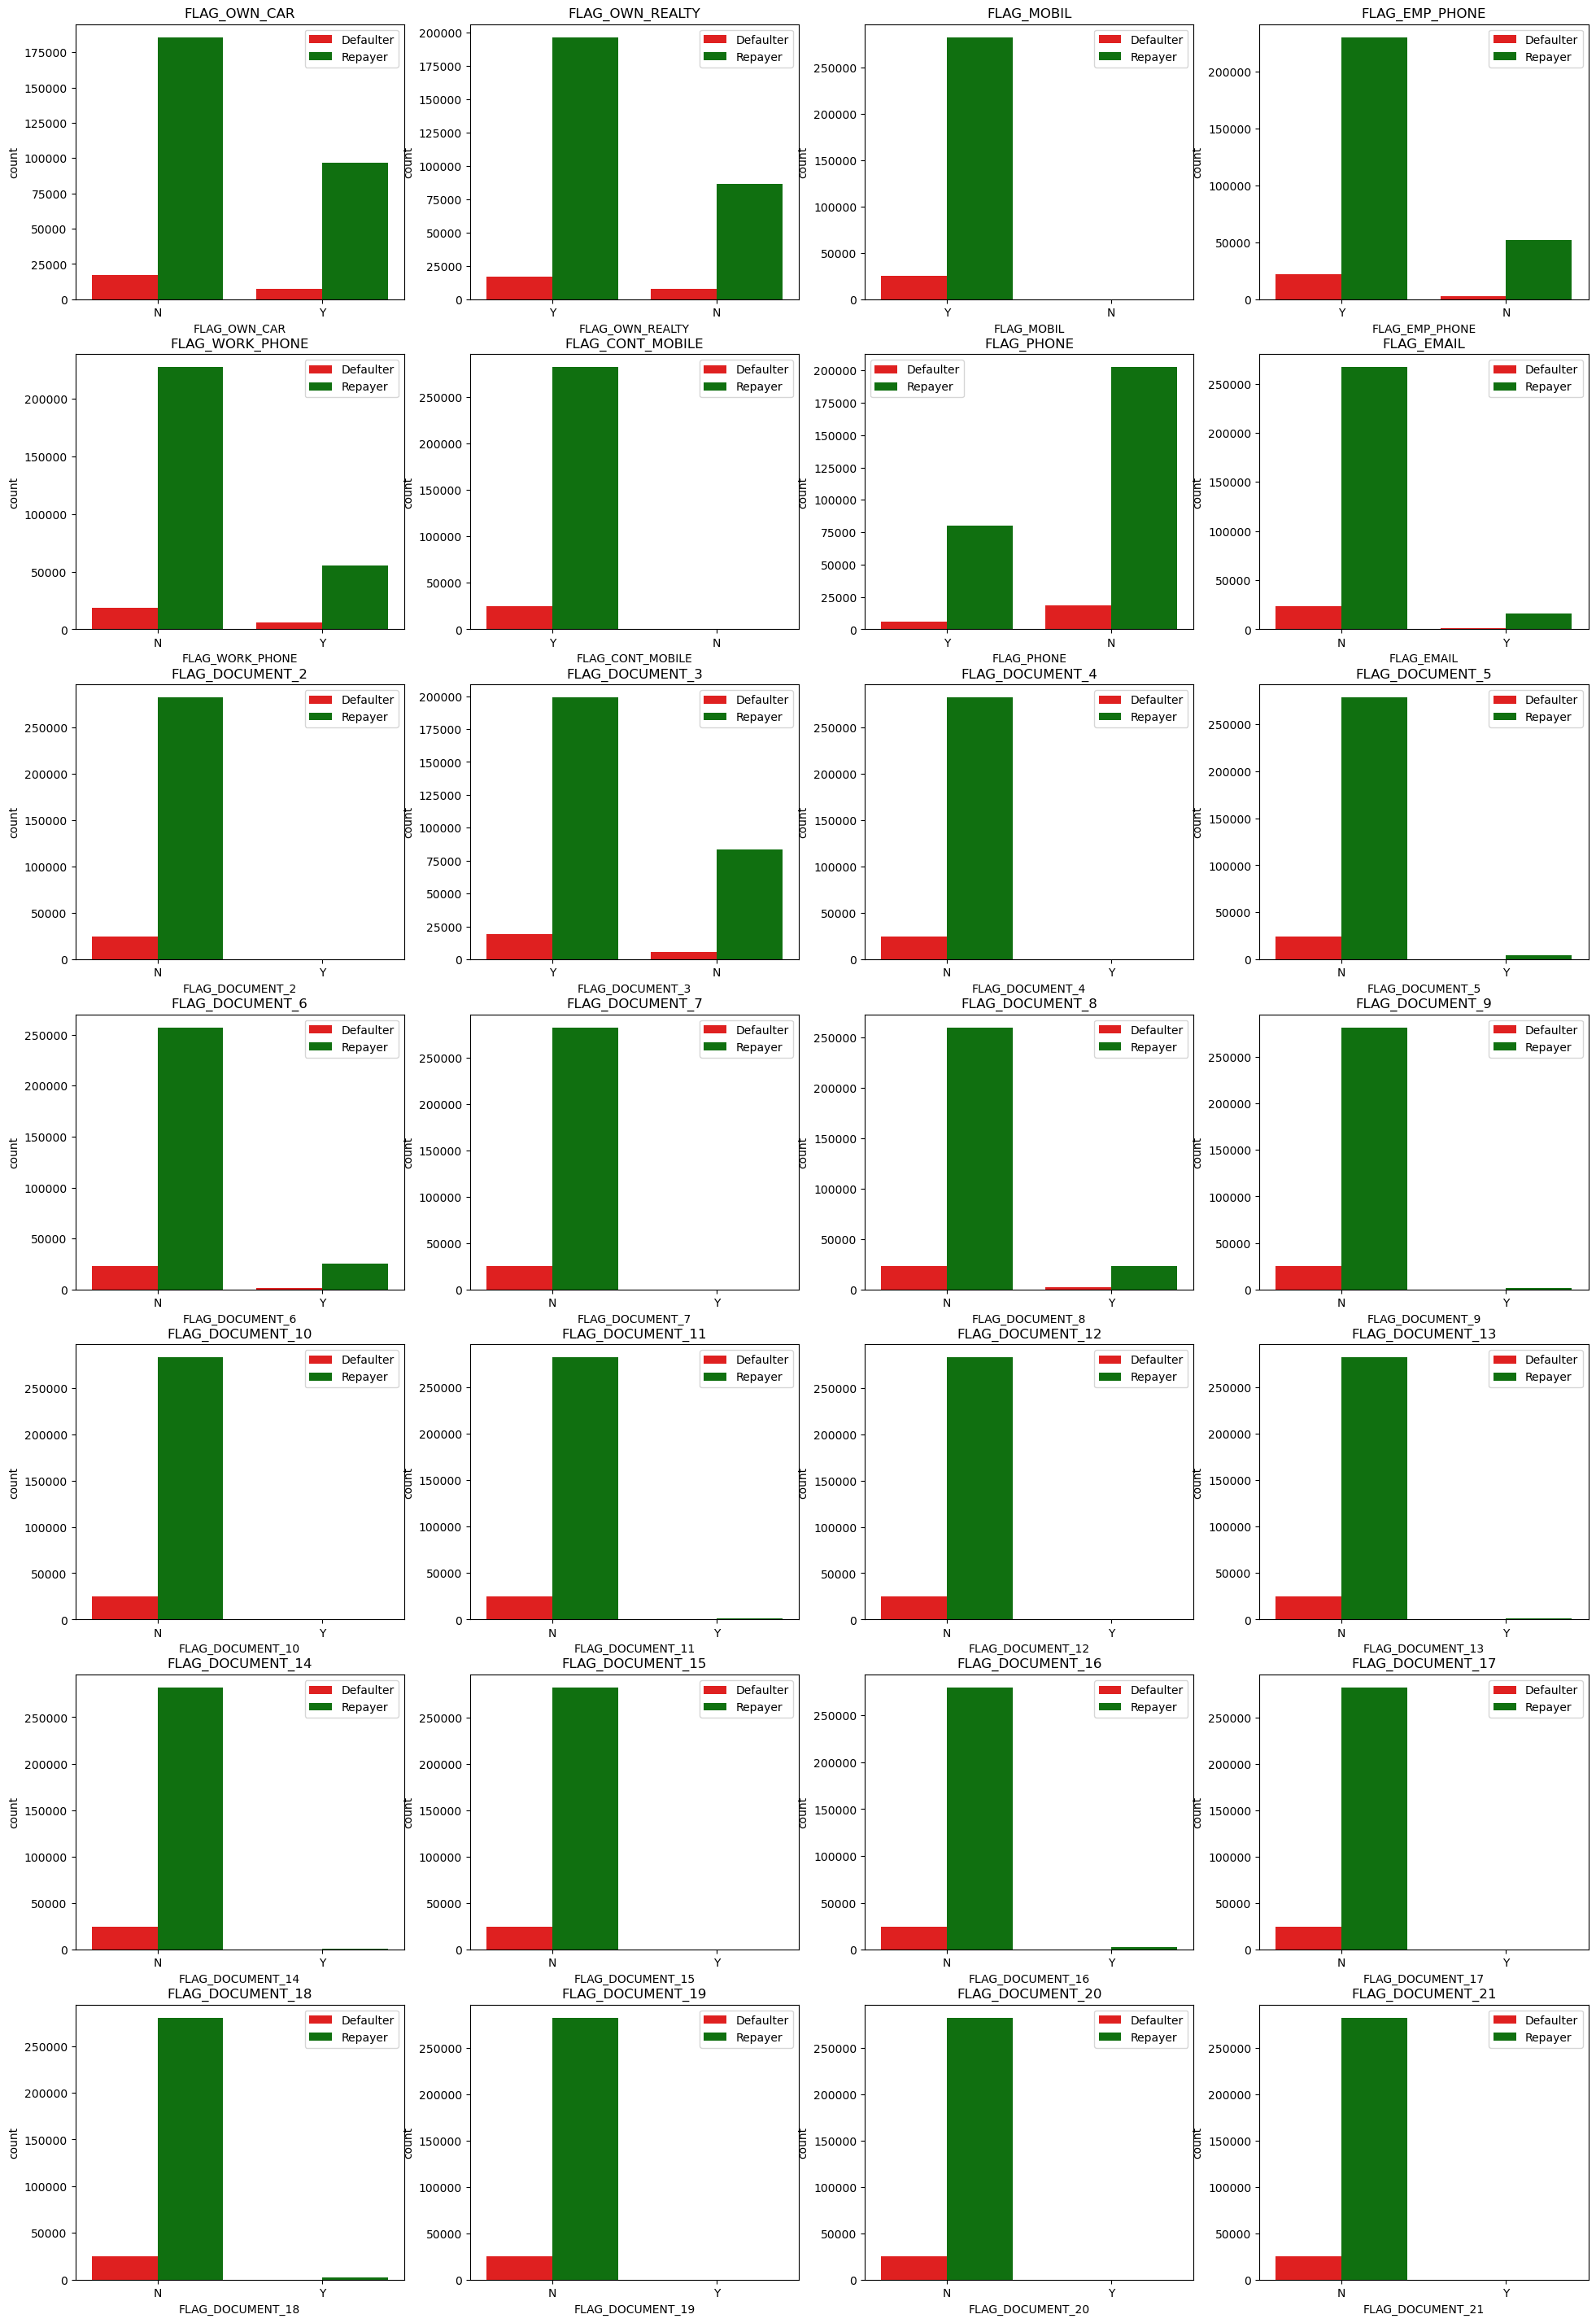

In [43]:
# using itertools for efficient looping plotting subplots
import itertools 

# Plotting all the graph to find the relation and evaluting
plt.figure(figsize = [24,36])
for i,j in itertools.zip_longest(flag_cols,range(len(flag_cols))):
    plt.subplot(7,4,j+1)
    ax = sns.countplot(flag_df[i], hue = flag_df["TARGET"], palette = ["r","g"])
    plt.title(i)
    plt.legend()

In [44]:
##check unique value count of all columns
app_data.nunique().sort_values()

FLAG_DOCUMENT_20                    2
FLAG_DOCUMENT_5                     2
FLAG_EMAIL                          2
FLAG_DOCUMENT_12                    2
FLAG_DOCUMENT_11                    2
FLAG_DOCUMENT_19                    2
REG_REGION_NOT_LIVE_REGION          2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
FLAG_DOCUMENT_10                    2
FLAG_DOCUMENT_9                     2
FLAG_DOCUMENT_8                     2
FLAG_DOCUMENT_7                     2
FLAG_DOCUMENT_21                    2
FLAG_DOCUMENT_2                     2
FLAG_DOCUMENT_3                     2
FLAG_DOCUMENT_4                     2
FLAG_CONT_MOBILE                    2
FLAG_WORK_PHONE                     2
FLAG_PHONE                          2
FLAG_MOBIL                          2
TARGET                              2
NAME_CONTRACT_TYPE                  2
CODE_GENDER 

In [45]:
#dropping columns which are not important to create meaningful report 
cols_drop=['FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL','REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE',
        'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR','NAME_TYPE_SUITE','REGION_POPULATION_RELATIVE',
       'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'FLAG_MOBIL',
           'DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH', 
       'LIVE_CITY_NOT_WORK_CITY','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6',
           'FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11',
           'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16',
           'FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']
app_data=app_data.drop(columns=cols_drop)
app_data.shape

(307511, 30)

### Creating two dataframes for Defaulter and Repayer for further analysis

In [46]:
#defaulter dataframe for clients with payment difficulties
df_defaulter=app_data[app_data['TARGET']=='Defaulter']
df_defaulter.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,AGE_IN_YEARS,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE,AGE_GROUP,WORKING_YEARS,AMT_INCOME,AMT_GOODS_PRICE_RANGE,AMT_CREDIT_RANGE
0,100002,Defaulter,Cash loans,M,N,Y,0,2.025,4.065975,24700.5,3.510,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,1.0,Business Entity Type 3,0.262949,0.139376,25.920548,1.745205,9.994521,5.808219,3.106849,20-30,0-5,2L-3L,3L-4L,4L-5L
26,100031,Defaulter,Cash loans,F,N,Y,0,1.125,9.799920,27076.5,7.020,Working,Secondary / secondary special,Widow,House / apartment,Cooking staff,1.0,Business Entity Type 3,0.548477,0.190706,51.298630,7.200000,18.008219,5.005479,0.441096,50-60,5-10,1L-2L,7L-8L,9L-10L
40,100047,Defaulter,Cash loans,M,N,Y,0,2.025,11.935800,35028.0,8.550,Commercial associate,Secondary / secondary special,Married,House / apartment,Laborers,2.0,Business Entity Type 3,0.306841,0.320163,47.895890,3.457534,3.238356,2.819178,2.945205,40-50,0-5,2L-3L,8L-9L,>10L
42,100049,Defaulter,Cash loans,F,N,N,0,1.350,2.888730,16258.5,2.385,Working,Secondary / secondary special,Civil marriage,House / apartment,Sales staff,2.0,Self-employed,0.674203,0.399676,36.668493,9.854795,0.123288,12.079452,4.054795,30-40,5-10,1L-2L,2L-3L,2L-3L
81,100096,Defaulter,Cash loans,F,N,Y,0,0.810,2.520000,14593.5,2.520,Pensioner,Secondary / secondary special,Married,House / apartment,unknown,2.0,XNA,0.023952,0.720944,67.928767,1000.665753,14.769863,11.504110,-0.000000,60+,NaN,0-1L,2L-3L,2L-3L


In [47]:
#repayer dataframe for clients without payment difficulties
df_repayer=app_data[app_data['TARGET']=='Repayer']
df_repayer.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,AGE_IN_YEARS,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE,AGE_GROUP,WORKING_YEARS,AMT_INCOME,AMT_GOODS_PRICE_RANGE,AMT_CREDIT_RANGE
1,100003,Repayer,Cash loans,F,N,N,0,2.700,12.935025,35698.5,11.295,State servant,Higher education,Married,House / apartment,Core staff,2.0,School,0.622246,NaN,45.931507,3.254795,3.249315,0.797260,2.268493,40-50,0-5,2L-3L,>10L,>10L
2,100004,Repayer,Revolving loans,M,Y,Y,0,0.675,1.350000,6750.0,1.350,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,1.0,Government,0.555912,0.729567,52.180822,0.616438,11.671233,6.934247,2.232877,50-60,0-5,0-1L,1L-2L,1L-2L
3,100006,Repayer,Cash loans,F,N,Y,0,1.350,3.126825,29686.5,2.970,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,2.0,Business Entity Type 3,0.650442,NaN,52.068493,8.326027,26.939726,6.676712,1.690411,50-60,5-10,1L-2L,2L-3L,3L-4L
4,100007,Repayer,Cash loans,M,N,Y,0,1.215,5.130000,21865.5,5.130,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,1.0,Religion,0.322738,NaN,54.608219,8.323288,11.810959,9.473973,3.030137,50-60,5-10,1L-2L,5L-6L,5L-6L
5,100008,Repayer,Cash loans,M,N,Y,0,0.990,4.904955,27517.5,4.545,State servant,Secondary / secondary special,Married,House / apartment,Laborers,2.0,Other,0.354225,0.621226,46.413699,4.350685,13.616438,1.306849,6.947945,40-50,0-5,0-1L,4L-5L,4L-5L


In [48]:
df_defaulter.shape

(24825, 30)

# Correlation

### Finding correlation for Repayer

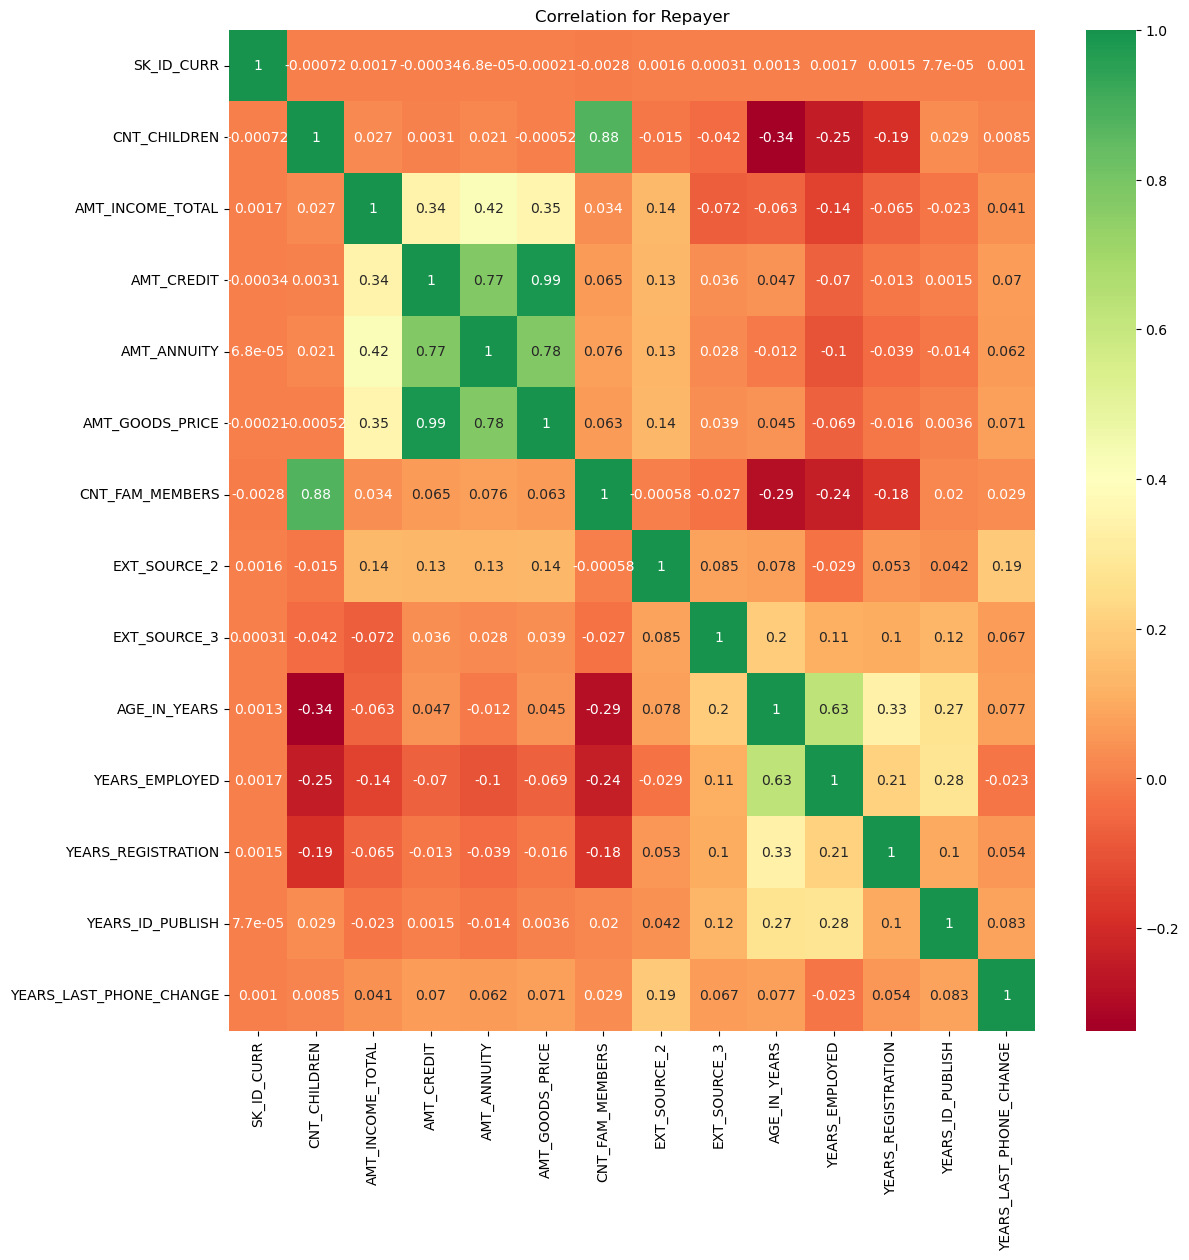

In [49]:
#plotting heatmap to find correlation between all numerical variables when target variable is Repayer
plt.figure(figsize=[13,13])
sns.heatmap(df_repayer.corr(), annot=True , cmap="RdYlGn",center=0.4)
plt.title('Correlation for Repayer')
plt.show()

### Insight

Highly correlated - AMT_INCOME_TOTAL, AMT_ANNUITY, AMT_GOODS_PRICE, AMT_CREDIT, AGE_IN_YEARS, YEARS_EMPLOYED.

### Finding correlation for Defaulter

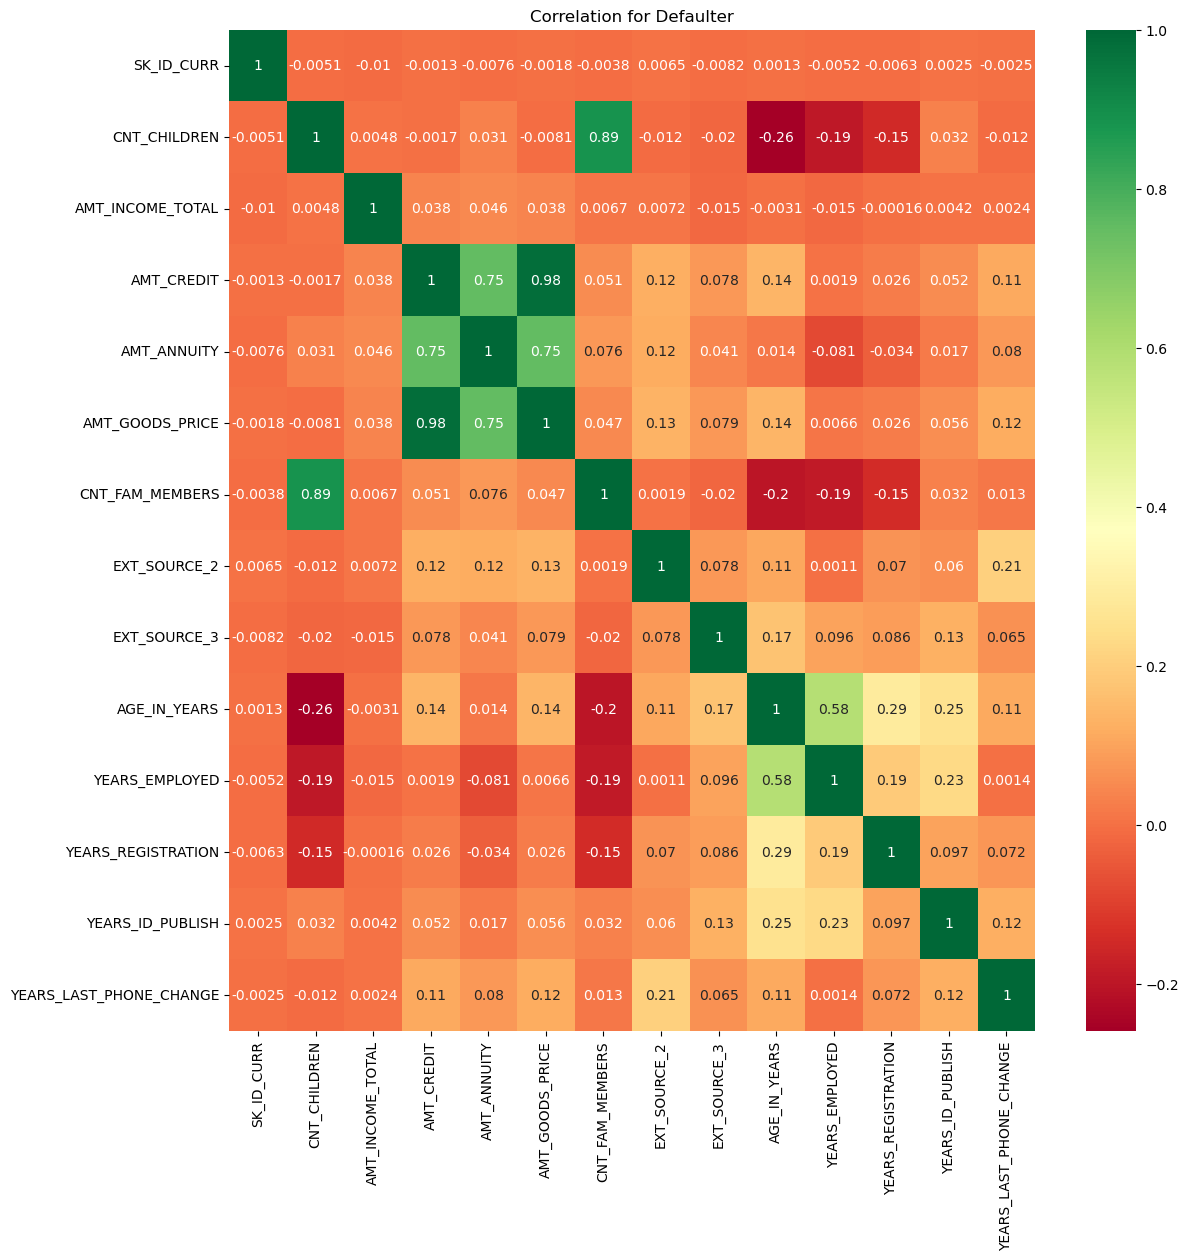

In [50]:
#plotting heatmap to find correlation between all numerical variables when target variable is Defaulter
plt.figure(figsize=[13,13])
sns.heatmap(df_defaulter.corr(), annot=True , cmap="RdYlGn")
plt.title('Correlation for Defaulter')
plt.show()

### Insight

All the columns correlated for Repayer are similar to columns correlated with Defaulter.

### checking outliers for AMT_INCOME_TOTAL with respect to Defaulter and Repayer

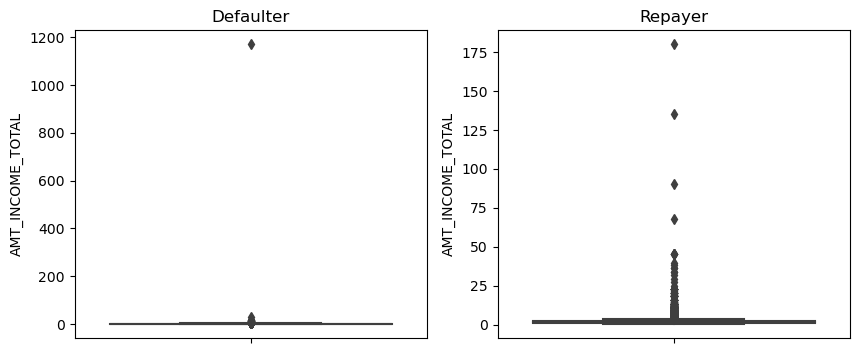

In [51]:
#plot boxplot for AMT_INCOME_TOTAL column for analysis
plt.figure(figsize=(10,4)) 

plt.subplot(1,2,1)
sns.boxplot(y=df_defaulter['AMT_INCOME_TOTAL'])
plt.title('Defaulter')

plt.subplot(1,2,2)                  
sns.boxplot(y=df_repayer['AMT_INCOME_TOTAL'])
plt.title('Repayer')
plt.show()

In [52]:
numerical_cols= ['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', ]
numerical_cols

['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']

### Pair plot of all numerical columns that mentioned above

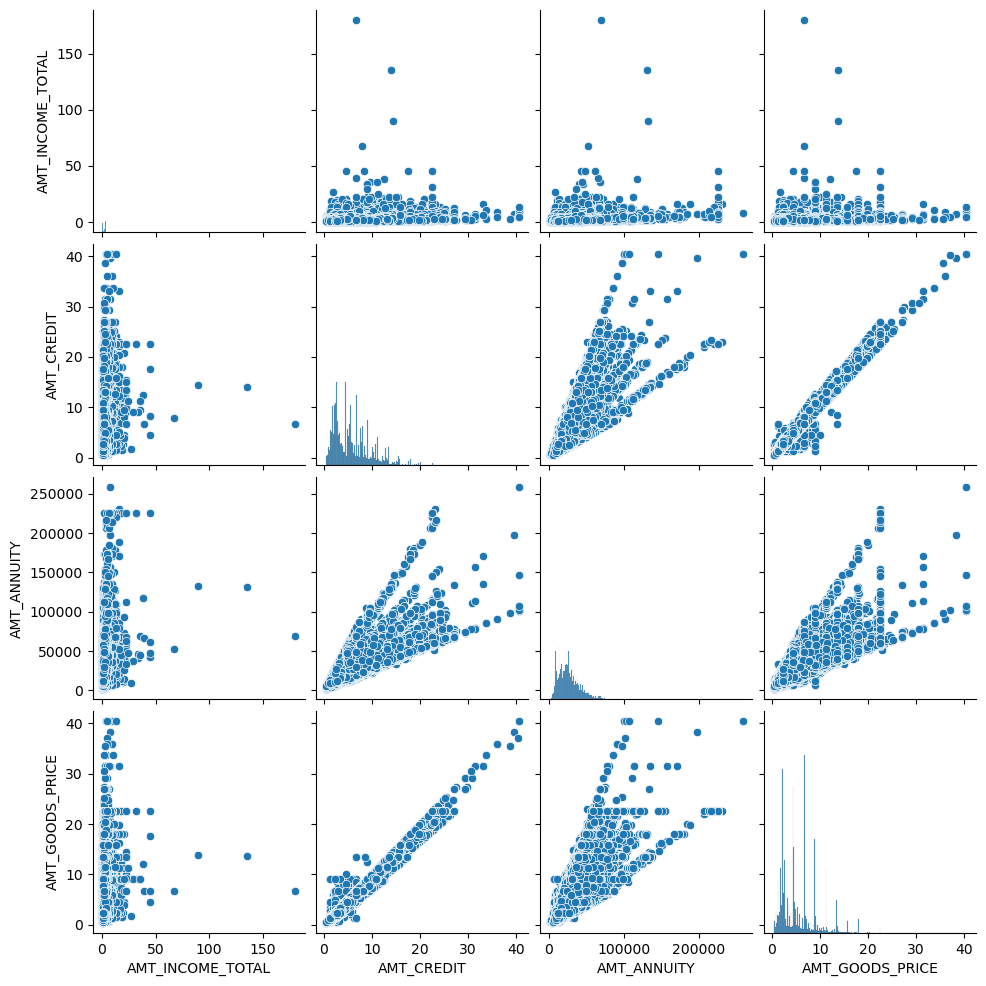

In [53]:
#pairplott for target varible Repayer
plot_pair=df_repayer[numerical_cols]
sns.pairplot(plot_pair)
plt.show()

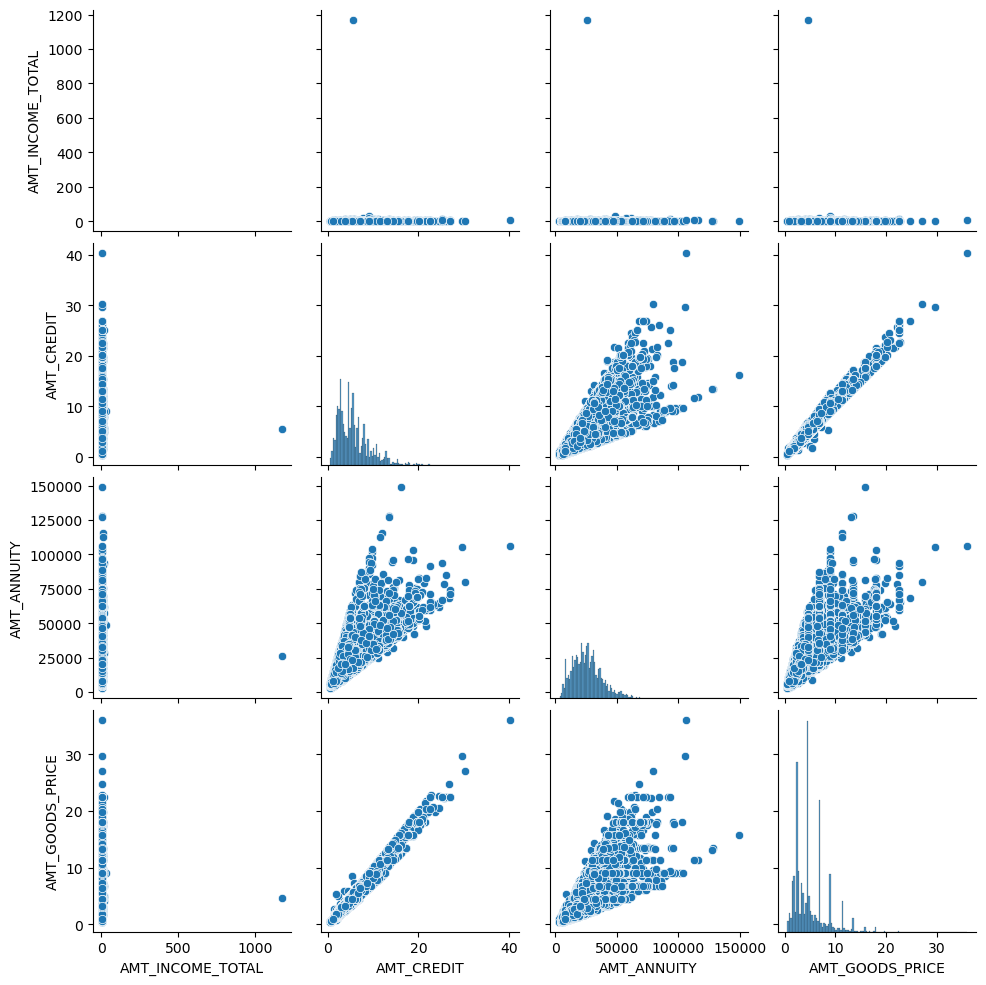

In [54]:
#Pairplot for target varible Defaulter
plot_pair=df_defaulter[numerical_cols]
sns.pairplot(plot_pair)
plt.show()

# Analyzing Previous Application data
Import Data

In [55]:
prev_app_data=pd.read_csv('previous_application.csv')
prev_app_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
#check for the rows and columns of dataframe
prev_app_data.shape

(1670214, 37)

In [57]:
#describe the dataset
prev_app_data.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [58]:
#checking data type of all columns
prev_app_data.info(all)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

## Handling and cleaning Data
Check for null values

Impute missing values

Remove columns containing higher percentage of null values

In [59]:
#getting sum of null values in each column
pd.set_option("display.max_rows", None) 
prev_app_data.isnull().sum().sort_values(ascending = False)

RATE_INTEREST_PRIVILEGED       1664263
RATE_INTEREST_PRIMARY          1664263
AMT_DOWN_PAYMENT                895844
RATE_DOWN_PAYMENT               895844
NAME_TYPE_SUITE                 820405
NFLAG_INSURED_ON_APPROVAL       673065
DAYS_TERMINATION                673065
DAYS_LAST_DUE                   673065
DAYS_LAST_DUE_1ST_VERSION       673065
DAYS_FIRST_DUE                  673065
DAYS_FIRST_DRAWING              673065
AMT_GOODS_PRICE                 385515
AMT_ANNUITY                     372235
CNT_PAYMENT                     372230
PRODUCT_COMBINATION                346
AMT_CREDIT                           1
NAME_YIELD_GROUP                     0
NAME_PORTFOLIO                       0
NAME_SELLER_INDUSTRY                 0
SELLERPLACE_AREA                     0
CHANNEL_TYPE                         0
NAME_PRODUCT_TYPE                    0
SK_ID_PREV                           0
NAME_GOODS_CATEGORY                  0
NAME_CLIENT_TYPE                     0
CODE_REJECT_REASON       

In [60]:
#get percentage of null values in each column
null_percentage = 100*prev_app_data.isnull().sum()/len(prev_app_data)
null_percentage.sort_values(ascending = False)

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
NAME_PORTFOLIO                  0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
SK_ID_PREV                      0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE

In [61]:
#get the columns having missing value percentage more then 20 to a list
null_percentage=null_percentage[null_percentage>20]
null_percentage

AMT_ANNUITY                  22.286665
AMT_DOWN_PAYMENT             53.636480
AMT_GOODS_PRICE              23.081773
RATE_DOWN_PAYMENT            53.636480
RATE_INTEREST_PRIMARY        99.643698
RATE_INTEREST_PRIVILEGED     99.643698
NAME_TYPE_SUITE              49.119754
CNT_PAYMENT                  22.286366
DAYS_FIRST_DRAWING           40.298129
DAYS_FIRST_DUE               40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_LAST_DUE                40.298129
DAYS_TERMINATION             40.298129
NFLAG_INSURED_ON_APPROVAL    40.298129
dtype: float64

In [62]:
null_percentage.index

Index(['AMT_ANNUITY', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_TYPE_SUITE', 'CNT_PAYMENT',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [63]:
prev_app_data.drop(columns = null_percentage.index,axis=1, inplace = True)
##validating the shape after dropping the columns

In [64]:
prev_app_data.shape

(1670214, 23)

In [65]:
prev_app_data.head(100)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_APPLICATION,AMT_CREDIT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,middle,POS mobile with interest
1,2802425,108129,Cash loans,607500.0,679671.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,112500.0,136444.5,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,high,Cash X-Sell: high
3,2819243,176158,Cash loans,450000.0,470790.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,337500.0,404055.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high,Cash Street: high
5,1383531,199383,Cash loans,315000.0,340573.5,SATURDAY,8,Y,1,Everyday expenses,Approved,-684,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,low_normal,Cash X-Sell: low
6,2315218,175704,Cash loans,0.0,0.0,TUESDAY,11,Y,1,XNA,Canceled,-14,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,XNA,Cash
7,1656711,296299,Cash loans,0.0,0.0,MONDAY,7,Y,1,XNA,Canceled,-21,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,XNA,Cash
8,2367563,342292,Cash loans,0.0,0.0,MONDAY,15,Y,1,XNA,Canceled,-386,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,XNA,Cash
9,2579447,334349,Cash loans,0.0,0.0,SATURDAY,15,Y,1,XNA,Canceled,-57,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,XNA,Cash


### Dropping the columns having XNA XPA values > 50%

In [66]:
prev_app_data['NAME_CASH_LOAN_PURPOSE'].value_counts(normalize=True)

XAP                                 0.552421
XNA                                 0.405887
Repairs                             0.014229
Other                               0.009345
Urgent needs                        0.005036
Buying a used car                   0.001729
Building a house or an annex        0.001612
Everyday expenses                   0.001447
Medicine                            0.001302
Payments on other loans             0.001156
Education                           0.000942
Journey                             0.000742
Purchase of electronic equipment    0.000635
Buying a new car                    0.000606
Wedding / gift / holiday            0.000576
Buying a home                       0.000518
Car repairs                         0.000477
Furniture                           0.000448
Buying a holiday home / land        0.000319
Business development                0.000255
Gasification / water supply         0.000180
Buying a garage                     0.000081
Hobby     

In [67]:
prev_app_data['NAME_PAYMENT_TYPE'].value_counts(normalize=True)

Cash through the bank                        0.618814
XNA                                          0.375631
Non-cash from your account                   0.004905
Cashless from the account of the employer    0.000650
Name: NAME_PAYMENT_TYPE, dtype: float64

In [68]:
prev_app_data['CODE_REJECT_REASON'].value_counts(normalize=True)

XAP       0.810132
HC        0.104915
LIMIT     0.033337
SCO       0.022432
CLIENT    0.015828
SCOFR     0.007670
XNA       0.003140
VERIF     0.002116
SYSTEM    0.000429
Name: CODE_REJECT_REASON, dtype: float64

In [69]:
prev_app_data['NAME_GOODS_CATEGORY'].value_counts(normalize=True)

XNA                         5.692738e-01
Mobile                      1.345384e-01
Consumer Electronics        7.279067e-02
Computers                   6.332662e-02
Audio/Video                 5.953788e-02
Furniture                   3.212522e-02
Photo / Cinema Equipment    1.498072e-02
Construction Materials      1.496515e-02
Clothing and Accessories    1.410238e-02
Auto Accessories            4.419194e-03
Jewelry                     3.765984e-03
Homewares                   3.007399e-03
Medical Supplies            2.300903e-03
Vehicles                    2.017706e-03
Sport and Leisure           1.784801e-03
Gardening                   1.597400e-03
Other                       1.529145e-03
Office Appliances           1.396827e-03
Tourism                     9.932859e-04
Medicine                    9.280248e-04
Direct Sales                2.670316e-04
Fitness                     1.251337e-04
Additional Service          7.663689e-05
Education                   6.406365e-05
Weapon          

In [70]:
prev_app_data['NAME_PORTFOLIO'].value_counts(normalize=True)

POS      0.413726
Cash     0.276350
XNA      0.222864
Cards    0.086806
Cars     0.000254
Name: NAME_PORTFOLIO, dtype: float64

In [71]:
prev_app_data['NAME_PRODUCT_TYPE'].value_counts(normalize=True)

XNA        0.636844
x-sell     0.273191
walk-in    0.089965
Name: NAME_PRODUCT_TYPE, dtype: float64

In [72]:
prev_app_data['NAME_SELLER_INDUSTRY'].value_counts(normalize=True)

XNA                     0.512342
Consumer electronics    0.238451
Connectivity            0.165266
Furniture               0.034636
Construction            0.017831
Clothing                0.014339
Industry                0.011492
Auto technology         0.002988
Jewelry                 0.001622
MLM partners            0.000727
Tourism                 0.000307
Name: NAME_SELLER_INDUSTRY, dtype: float64

In [73]:
cols_drop1 =['NAME_CASH_LOAN_PURPOSE', 'CODE_REJECT_REASON','NAME_GOODS_CATEGORY']

In [74]:
prev_app_data=prev_app_data.drop(columns=cols_drop1)
prev_app_data.shape

(1670214, 20)

There are also few columns which are irrevelant to our analysis, dropping them as well.

In [75]:
# drop these columns
cols_drop2 = [
    'WEEKDAY_APPR_PROCESS_START',
    'HOUR_APPR_PROCESS_START',
    'NAME_PORTFOLIO',
    'NAME_PRODUCT_TYPE',
    'CHANNEL_TYPE',
    'SELLERPLACE_AREA',
    'NAME_SELLER_INDUSTRY',
    'PRODUCT_COMBINATION']
prev_app_data=prev_app_data.drop(columns=cols_drop2)
prev_app_data.shape

(1670214, 12)

In [76]:
prev_app_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_APPLICATION,AMT_CREDIT,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,NAME_CLIENT_TYPE,NAME_YIELD_GROUP
0,2030495,271877,Consumer loans,17145.0,17145.0,Y,1,Approved,-73,Cash through the bank,Repeater,middle
1,2802425,108129,Cash loans,607500.0,679671.0,Y,1,Approved,-164,XNA,Repeater,low_action
2,2523466,122040,Cash loans,112500.0,136444.5,Y,1,Approved,-301,Cash through the bank,Repeater,high
3,2819243,176158,Cash loans,450000.0,470790.0,Y,1,Approved,-512,Cash through the bank,Repeater,middle
4,1784265,202054,Cash loans,337500.0,404055.0,Y,1,Refused,-781,Cash through the bank,Repeater,high


In [77]:
# Removing the rows where category = XNA
prev_app_data = prev_app_data[(prev_app_data.NAME_CLIENT_TYPE != 'XNA')]
prev_app_data = prev_app_data[(prev_app_data.NAME_CONTRACT_TYPE != 'XNA')]

In [78]:
#change days to positive from negative and converting them to years for better readability
prev_app_data['DAYS_DECISION'] = prev_app_data['DAYS_DECISION'].abs()
prev_app_data['YEARS_DECISION']=prev_app_data.DAYS_DECISION/ 365
prev_app_data=prev_app_data.drop(columns=['DAYS_DECISION'])

### Checking outliers

In [79]:
outlier_cols = ['AMT_APPLICATION','AMT_CREDIT']
outlier_cols

['AMT_APPLICATION', 'AMT_CREDIT']

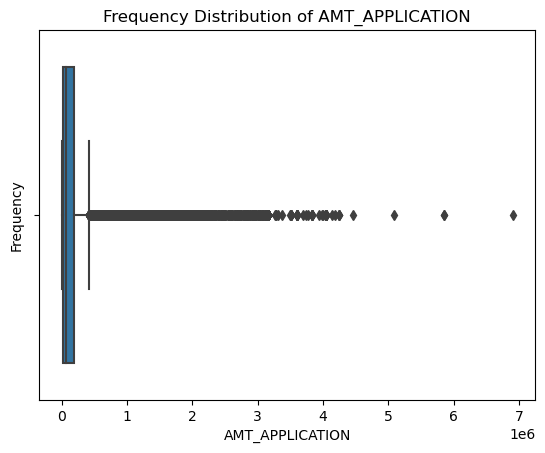

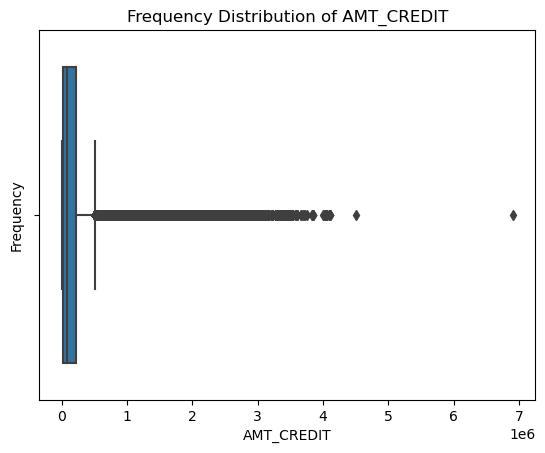

In [80]:
#plot boxplot for checking outliers
for i in outlier_cols:
    sns.boxplot(prev_app_data[i])
    plt.xlabel(i)
    plt.ylabel("Frequency")
    str1="Frequency Distribution of "+i
    plt.title(str1)
    plt.show()

There are outliers present for both AMT_CREDIT and AMT_APPLICATION

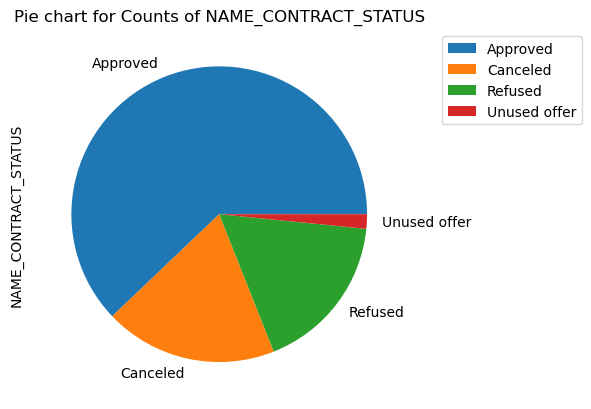

In [81]:
##plot the pie chart of NAME_CONTRACT_STATUS
contract_status = prev_app_data["NAME_CONTRACT_STATUS"].value_counts()
contract_status.plot.pie(title='Pie chart for Counts of NAME_CONTRACT_STATUS')
plt.legend(loc = 'upper right',bbox_to_anchor=(1.5,1))
plt.show()

High percentage of loan applications are approved

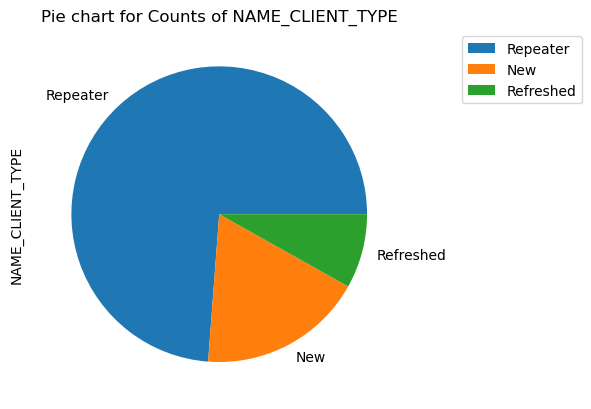

In [82]:
##plot the pie chart of NAME_CLIENT_TYPE
client_type = prev_app_data["NAME_CLIENT_TYPE"].value_counts()
client_type.plot.pie(title='Pie chart for Counts of NAME_CLIENT_TYPE')
plt.legend(loc='upper right',bbox_to_anchor=(1.5,1))
plt.show()

High percentage of loan applicants are Repeater

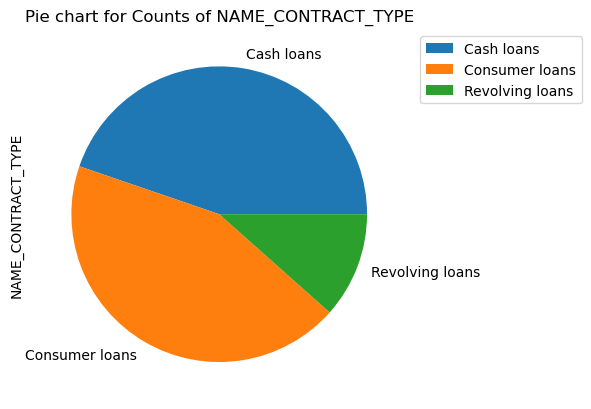

In [83]:
##plot the pie chart of NAME_CONTRACT_TYPE
contract_type = prev_app_data["NAME_CONTRACT_TYPE"].value_counts()
contract_type.plot.pie(title='Pie chart for Counts of NAME_CONTRACT_TYPE')
plt.legend(loc='upper right',bbox_to_anchor=(1.5,1))
plt.show()

Consumer loans and Cash loans are equally equally demanded.

# Merging Application data and Previous application data

In [84]:
#merging the application_data with previous application data
df_merge = pd.merge(left=app_data, right=prev_app_data, how='inner', on='SK_ID_CURR',suffixes=['_PREV','_CURR'])

In [85]:
df_merge.head(50)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_PREV,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_PREV,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,AGE_IN_YEARS,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE,AGE_GROUP,WORKING_YEARS,AMT_INCOME,AMT_GOODS_PRICE_RANGE,AMT_CREDIT_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPE_CURR,AMT_APPLICATION,AMT_CREDIT_CURR,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,NAME_CLIENT_TYPE,NAME_YIELD_GROUP,YEARS_DECISION
0,100002,Defaulter,Cash loans,M,N,Y,0,2.025000,4.065975,24700.5,3.510,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,1.0,Business Entity Type 3,0.262949,0.139376,25.920548,1.745205,9.994521,5.808219,3.106849,20-30,0-5,2L-3L,3L-4L,4L-5L,1038818,Consumer loans,179055.00,179055.0,Y,1,Approved,XNA,New,low_normal,1.660274
1,100003,Repayer,Cash loans,F,N,N,0,2.700000,12.935025,35698.5,11.295,State servant,Higher education,Married,House / apartment,Core staff,2.0,School,0.622246,NaN,45.931507,3.254795,3.249315,0.797260,2.268493,40-50,0-5,2L-3L,>10L,>10L,1810518,Cash loans,900000.00,1035882.0,Y,1,Approved,XNA,Repeater,low_normal,2.043836
2,100003,Repayer,Cash loans,F,N,N,0,2.700000,12.935025,35698.5,11.295,State servant,Higher education,Married,House / apartment,Core staff,2.0,School,0.622246,NaN,45.931507,3.254795,3.249315,0.797260,2.268493,40-50,0-5,2L-3L,>10L,>10L,2636178,Consumer loans,337500.00,348637.5,Y,1,Approved,Cash through the bank,Refreshed,middle,2.268493
3,100003,Repayer,Cash loans,F,N,N,0,2.700000,12.935025,35698.5,11.295,State servant,Higher education,Married,House / apartment,Core staff,2.0,School,0.622246,NaN,45.931507,3.254795,3.249315,0.797260,2.268493,40-50,0-5,2L-3L,>10L,>10L,2396755,Consumer loans,68809.50,68053.5,Y,1,Approved,Cash through the bank,Refreshed,middle,6.413699
4,100004,Repayer,Revolving loans,M,Y,Y,0,0.675000,1.350000,6750.0,1.350,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,1.0,Government,0.555912,0.729567,52.180822,0.616438,11.671233,6.934247,2.232877,50-60,0-5,0-1L,1L-2L,1L-2L,1564014,Consumer loans,24282.00,20106.0,Y,1,Approved,Cash through the bank,New,middle,2.232877
5,100006,Repayer,Cash loans,F,N,Y,0,1.350000,3.126825,29686.5,2.970,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,2.0,Business Entity Type 3,0.650442,NaN,52.068493,8.326027,26.939726,6.676712,1.690411,50-60,5-10,1L-2L,2L-3L,3L-4L,2078043,Cash loans,675000.00,675000.0,Y,1,Approved,Cash through the bank,Repeater,low_normal,0.495890
6,100006,Repayer,Cash loans,F,N,Y,0,1.350000,3.126825,29686.5,2.970,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,2.0,Business Entity Type 3,0.650442,NaN,52.068493,8.326027,26.939726,6.676712,1.690411,50-60,5-10,1L-2L,2L-3L,3L-4L,2827850,Revolving loans,0.00,0.0,Y,1,Canceled,XNA,Repeater,XNA,0.495890
7,100006,Repayer,Cash loans,F,N,Y,0,1.350000,3.126825,29686.5,2.970,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,2.0,Business Entity Type 3,0.650442,NaN,52.068493,8.326027,26.939726,6.676712,1.690411,50-60,5-10,1L-2L,2L-3L,3L-4L,2190416,Consumer loans,334917.00,267930.0,Y,1,Approved,Cash through the bank,Repeater,high,0.852055
8,100006,Repayer,Cash loans,F,N,Y,0,1.350000,3.126825,29686.5,2.970,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,2.0,Business Entity Type 3,0.650442,NaN,52.068493,8.326027,26.939726,6.676712,1.690411,50-60,5-10,1L-2L,2L-3L,3L-4L,1489396,Revolving loans,270000.00,270000.0,Y,1,Approved,XNA,Repeater,XNA,0.495890
9,100006,Repayer,Cash loans,F,N,Y,0,1.350000,3.126825,29686.5,2.970,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,2.0,Business Entity Type 3,0.650442,NaN,52.068493,8.326

In [86]:
df_merge.shape

(1411845, 41)

In [87]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1411845 entries, 0 to 1411844
Data columns (total 41 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1411845 non-null  int64   
 1   TARGET                       1411845 non-null  object  
 2   NAME_CONTRACT_TYPE_PREV      1411845 non-null  object  
 3   CODE_GENDER                  1411845 non-null  object  
 4   FLAG_OWN_CAR                 1411845 non-null  object  
 5   FLAG_OWN_REALTY              1411845 non-null  object  
 6   CNT_CHILDREN                 1411845 non-null  int64   
 7   AMT_INCOME_TOTAL             1411845 non-null  float64 
 8   AMT_CREDIT_PREV              1411845 non-null  float64 
 9   AMT_ANNUITY                  1411754 non-null  float64 
 10  AMT_GOODS_PRICE              1410639 non-null  float64 
 11  NAME_INCOME_TYPE             1411845 non-null  object  
 12  NAME_EDUCATION_TYPE         

### Create two dataframes for Defaulter and Repayer for comparison with diffreent variables

In [88]:
#create two dataframes for further analysis
df_merge_Repayer=df_merge[df_merge['TARGET']== 'Repayer']
df_merge_Defaulter=df_merge[df_merge['TARGET']== 'Defaulter']

## Correlation

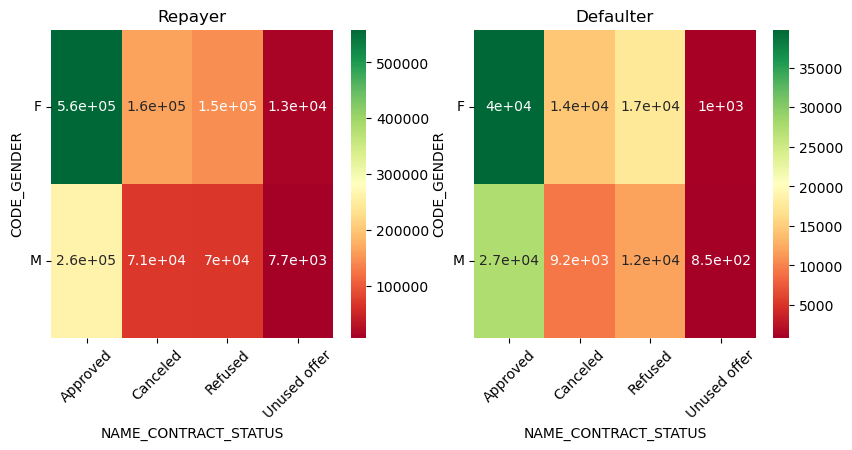

In [89]:
#Plot the heatmap to distribute correlation between 'NAME_CONTRACT_STATUS' and 'CODE_GENDER'  

plt.figure(figsize=(10,4)) 
plt.subplot(1,2,1)
corr1 = df_merge_Repayer.groupby(['CODE_GENDER'])['NAME_CONTRACT_STATUS'].value_counts().unstack()
sns.heatmap(corr1, annot=True, cmap='RdYlGn')
plt.xticks(rotation = 45)
plt.yticks(rotation = 0)
plt.title('Repayer')


plt.subplot(1,2,2)
corr2 = df_merge_Defaulter.groupby(['CODE_GENDER'])['NAME_CONTRACT_STATUS'].value_counts().unstack()
sns.heatmap(corr2, annot=True, cmap='RdYlGn')
plt.xticks(rotation = 45)
plt.yticks(rotation = 0)
plt.title('Defaulter')
plt.show()

Repayer -
Loan application status of females is approved in large numbers, 
while Males have high number of Unused offer.

Defaulter -
Females have least number of unused offer, 
while Males have high number of cancelled application status.


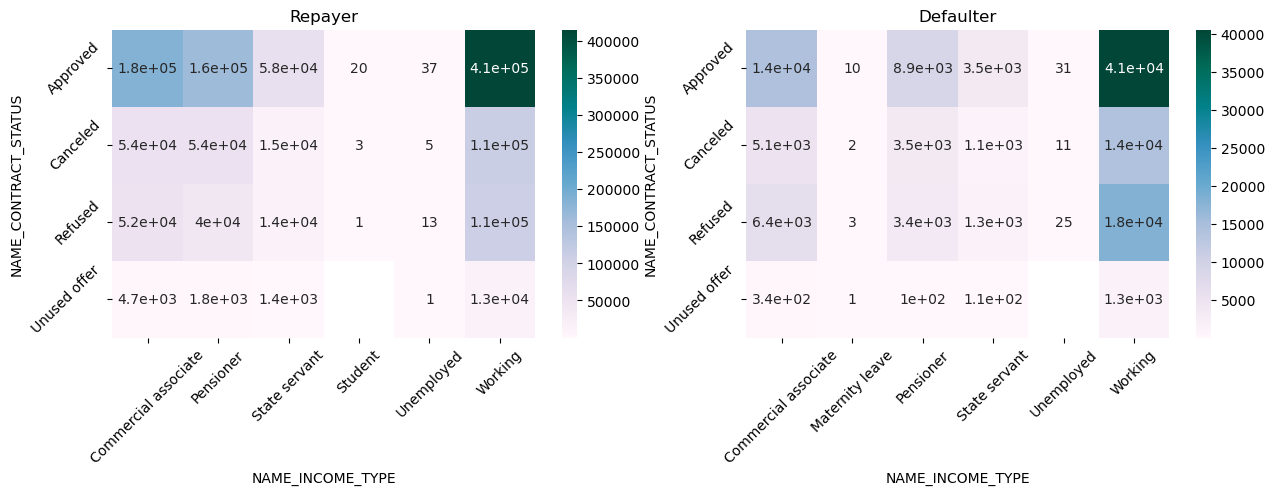

In [90]:
#Plot the heatmap to distribute correlation between 'NAME_CONTRACT_STATUS' and 'CODE_GENDER'  

plt.figure(figsize=(15,4)) 
plt.subplot(1,2,1)
corr3 = df_merge_Repayer.groupby(['NAME_CONTRACT_STATUS'])['NAME_INCOME_TYPE'].value_counts().unstack()
sns.heatmap(corr3, annot=True, cmap='PuBuGn')
plt.title('Repayer')
plt.xticks(rotation=45)
plt.yticks(rotation=45)


plt.subplot(1,2,2)
corr4 = df_merge_Defaulter.groupby(['NAME_CONTRACT_STATUS'])['NAME_INCOME_TYPE'].value_counts().unstack()
sns.heatmap(corr4, annot=True, cmap='PuBuGn')
plt.title('Defaulter')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

Insight - 

Most number of clients are from Working class which are defaulter and Repayer both.

There is no correlation between student vs unused offer and unemployed vs unused offer.

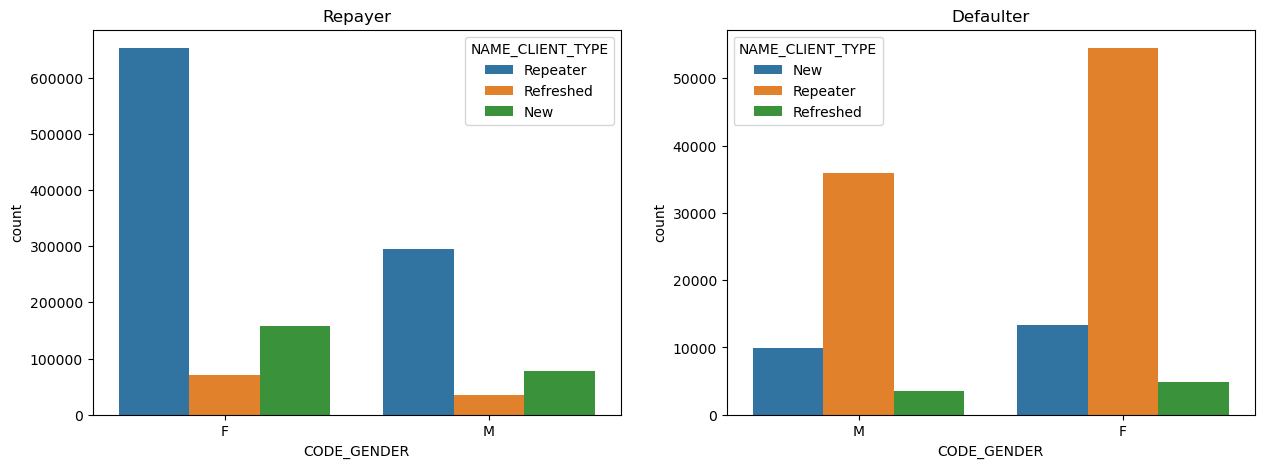

In [91]:
###Plot the graphs of Distribution of 'NAME_CLIENT_TYPE' with 'CODE_GENDER'
plt.figure(figsize=(15,5)) 

plt.subplot(1,2,1)
sns.countplot(data=df_merge_Repayer,x='CODE_GENDER',hue='NAME_CLIENT_TYPE')
plt.title('Repayer')

plt.subplot(1,2,2)
sns.countplot(data=df_merge_Defaulter,x='CODE_GENDER',hue='NAME_CLIENT_TYPE')
plt.title('Defaulter')

plt.show()

Insight -

More number of Female which pays loan on time are repeater as compared to refreshed and new client.

Males which are repayer are also the repeater high in numbers as compared to refreshed and new client.

Females and Males both are also highest in number on defaulting as compared to other categories in their respective gender.

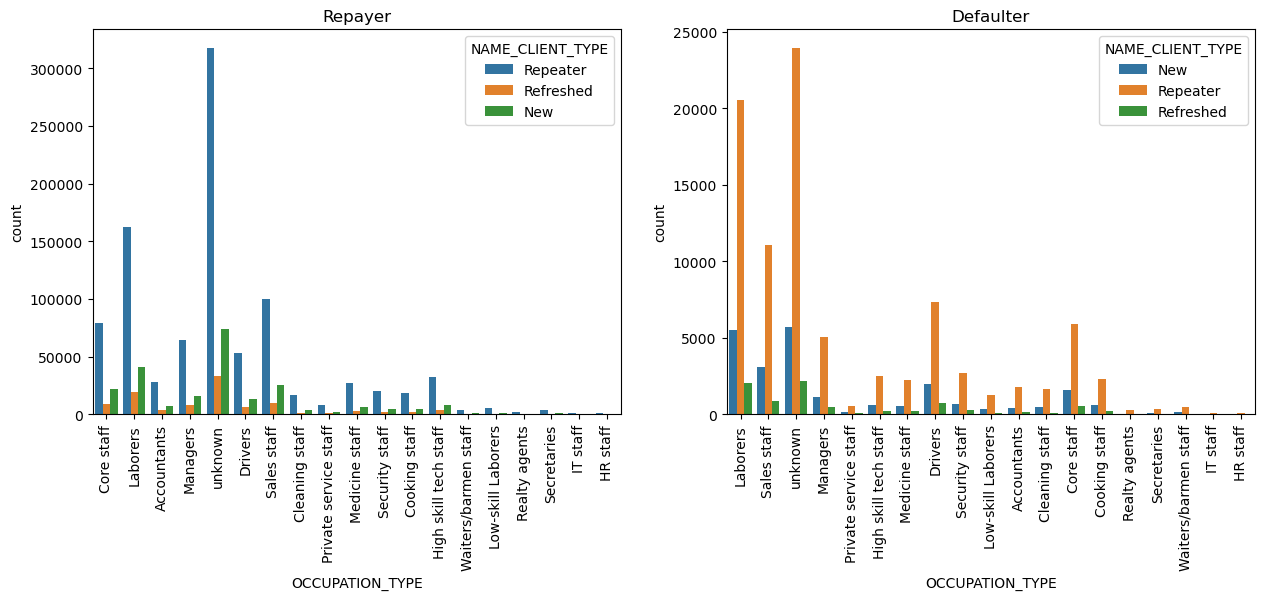

In [92]:
##Plot thedistribution of OCCUPATION_TYPE and NAME_CLIENT_TYPE
plt.figure(figsize=(15,5)) 

plt.subplot(1,2,1)
sns.countplot(data = df_merge_Repayer,x='OCCUPATION_TYPE',hue='NAME_CLIENT_TYPE')
plt.title('Repayer')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(data = df_merge_Defaulter,x='OCCUPATION_TYPE',hue='NAME_CLIENT_TYPE')
plt.title('Defaulter')
plt.xticks(rotation=90)
plt.show()

Unknown ocuupation type clients are in the highest in numbers in both Repayer and Defaulter list.

More number of Repeater clients are Defaulter and Repayer as compared with New and Refreshed clients

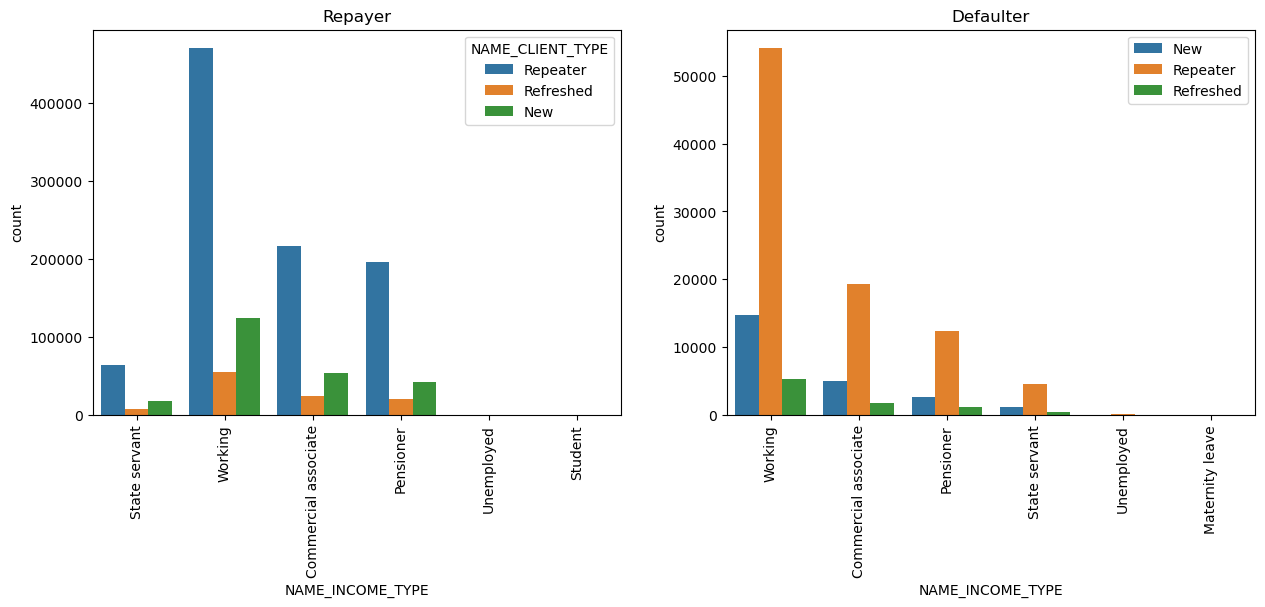

In [93]:
##Plot Distribution of 'NAME_CLIENT_TYPE' with 'NAME_INCOME_TYPE'
plt.figure(figsize=(15,5)) 

plt.subplot(1,2,1)
sns.countplot(data=df_merge_Repayer,x='NAME_INCOME_TYPE',hue='NAME_CLIENT_TYPE')
plt.title('Repayer')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(data=df_merge_Defaulter,x='NAME_INCOME_TYPE',hue='NAME_CLIENT_TYPE')
plt.title('Defaulter')
plt.xticks(rotation=90)
plt.legend(loc=1)
plt.show()

Working class have the highest numbetr of repeaters as compared to other categories in both Defaulter and repayer list.

Student and maternity leave clients are lowest among the category.